# numpy 实现手写数字识别

需要的包：

In [1]:
! pip install mnist scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


## numpy 和 mnist 实现的示例 - 有问题

实现一个多层感知机，一个隐藏层。

代码有点问题，准确率一直不高。


In [13]:
%%time

import numpy as np
import mnist

# 加载 MNIST 数据集
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# 数据预处理
# 将图像像素值归一化到[0,1]之间
train_images = (train_images / 255).reshape(-1, 28*28)
test_images = (test_images / 255).reshape(-1, 28*28)

# 将标签转换为独热编码
def one_hot_encoding(labels, num_classes):
    one_hot_labels = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        one_hot_labels[i][label] = 1
    return one_hot_labels

num_classes = 10
train_labels = one_hot_encoding(train_labels, num_classes)
test_labels = one_hot_encoding(test_labels, num_classes)

# 定义神经网络结构
input_size = 28*28
hidden_size = 64
output_size = num_classes
learning_rate = 0.1
num_epochs = 10
batch_size = 1000

# 初始化权重和偏置
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_input_hidden = np.zeros(hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_hidden_output = np.zeros(output_size)

# 定义激活函数（这里使用ReLU）
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# 定义反向传播
def backward(input_data, hidden_output, output, targets, weights_hidden_output, bias_hidden_output, weights_input_hidden, bias_input_hidden):
    output_error = output - targets
    hidden_error = np.dot(output_error, weights_hidden_output.T) * relu_derivative(hidden_output)
    
    # 更新权重和偏置
    weights_hidden_output_gradient = np.dot(hidden_output.T, output_error) / len(input_data)
    bias_hidden_output_gradient = np.mean(output_error, axis=0)
    weights_input_hidden_gradient = np.dot(input_data.T, hidden_error) / len(input_data)
    bias_input_hidden_gradient = np.mean(hidden_error, axis=0)
    
    # 梯度下降更新权重和偏置
    weights_hidden_output -= learning_rate * weights_hidden_output_gradient
    bias_hidden_output -= learning_rate * bias_hidden_output_gradient
    weights_input_hidden -= learning_rate * weights_input_hidden_gradient
    bias_input_hidden -= learning_rate * bias_input_hidden_gradient

# 训练模型
for epoch in range(num_epochs):
    # 随机打乱训练数据
    permutation = np.random.permutation(len(train_images))
    train_images_shuffled = train_images[permutation]
    train_labels_shuffled = train_labels[permutation]
    
    for i in range(0, len(train_images_shuffled), batch_size):
        batch_images = train_images_shuffled[i:i+batch_size]
        batch_labels = train_labels_shuffled[i:i+batch_size]
        
        hidden_output, output = forward(batch_images)
        loss = cross_entropy_loss(output, batch_labels)
        backward(batch_images, hidden_output, output, batch_labels, weights_hidden_output, bias_hidden_output, weights_input_hidden, bias_input_hidden)  # 传递偏置参数
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss}")


# 测试模型
correct = 0
for i in range(len(test_images)):
    _, output = forward(test_images[i:i+1])
    prediction = np.argmax(output)
    if prediction == np.argmax(test_labels[i]):
        correct += 1

accuracy = correct / len(test_images)
print(f"Test Accuracy: {accuracy}")


<timed exec>:57: RuntimeWarning: invalid value encountered in log


Epoch 1/10, Loss: nan
Epoch 2/10, Loss: 0.2668858192777234
Epoch 3/10, Loss: 0.230462002671504
Epoch 4/10, Loss: 0.22993548801371777
Epoch 5/10, Loss: 0.2297300283805427
Epoch 6/10, Loss: 0.23020584866593663
Epoch 7/10, Loss: 0.23002339529524007
Epoch 8/10, Loss: 0.2298833888658425
Epoch 9/10, Loss: 0.22997758263237292
Epoch 10/10, Loss: 0.23014328172283186
Test Accuracy: 0.1135
CPU times: user 6.22 s, sys: 1.44 s, total: 7.66 s
Wall time: 4.43 s


## 准确率正常的示例，使用 scikit-learn

In [ ]:
准确率比较高的版本，使用了 scikit-learn

mlp是使用了 scikit-learn api。

Accuracy: 0.979


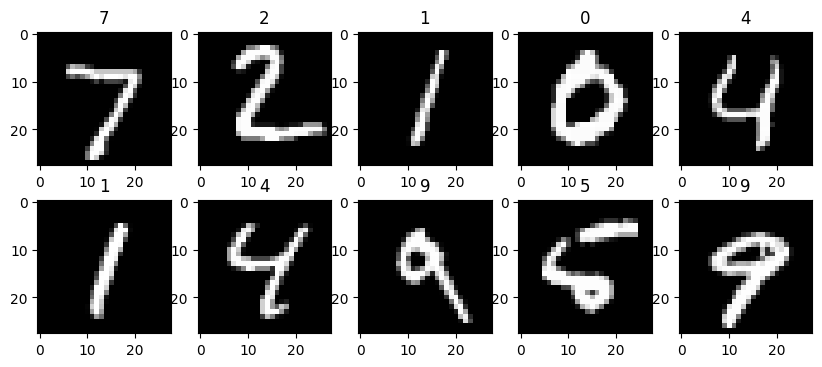

In [24]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 加载 MNIST 数据集
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# 将数据转换为 NumPy 数组
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# 将图像数据转换为特征
train_features = train_images.reshape((train_images.shape[0], -1)).astype(np.float32) / 255
test_features = test_images.reshape((test_images.shape[0], -1)).astype(np.float32) / 255

# 创建 MLP 模型
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, alpha=0.0001, solver='adam', random_state=42)

# 训练模型
mlp.fit(train_features, train_labels)

# 预测测试集
test_predictions = mlp.predict(test_features)

# 计算准确率
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy:", accuracy)

# 可视化一些错误预测
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axs.flat):
    if i < len(test_images):
        ax.imshow(test_images[i], cmap='gray', interpolation='nearest')
        ax.set_title(str(test_labels[i]))
    else:
        ax.set_visible(False)

plt.show()


## 手工实现 mlp 的示例

需要很高的epoch，才能有较高的识别精度。

增加epoch的值，确实能提高精度。

In [7]:
%%time

import numpy as np
import mnist
from sklearn.preprocessing import StandardScaler

# 加载 MNIST 数据集
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# 数据预处理：将图像数据展平为一维向量，并进行标准化
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# 将标签转换为独热编码
num_classes = 10
train_labels_one_hot = np.eye(num_classes)[train_labels]
test_labels_one_hot = np.eye(num_classes)[test_labels]

# MLP模型定义
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        self.hidden_layer = np.maximum(0, np.dot(X, self.W1) + self.b1)
        scores = np.dot(self.hidden_layer, self.W2) + self.b2
        return scores

    def backward(self, X, y, learning_rate):
        num_examples = X.shape[0]
        delta_scores = self.probs.copy()
        delta_scores[range(num_examples), y] -= 1
        delta_scores /= num_examples

        delta_hidden = np.dot(delta_scores, self.W2.T)
        delta_hidden[self.hidden_layer <= 0] = 0

        dW2 = np.dot(self.hidden_layer.T, delta_scores)
        db2 = np.sum(delta_scores, axis=0)

        dW1 = np.dot(X.T, delta_hidden)
        db1 = np.sum(delta_hidden, axis=0)

        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, learning_rate, num_epochs):
        for epoch in range(num_epochs):
            scores = self.forward(X)
            scores -= np.max(scores, axis=1, keepdims=True)  # 处理数值范围
            exp_scores = np.exp(scores)
            self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            loss = -np.log(self.probs[range(X.shape[0]), y] + 1e-8)
            loss = np.mean(loss)

            if epoch % (num_epochs/10) == 0:
                print("Epoch {}: loss = {}".format(epoch, loss))

            self.backward(X, y, learning_rate)

    def predict(self, X):
        scores = self.forward(X)
        predicted_labels = np.argmax(scores, axis=1)
        return predicted_labels

# 模型训练与测试
input_size = train_images.shape[1]
hidden_size = 128
output_size = num_classes
learning_rate = 0.001
num_epochs = 10000

mlp = MLP(input_size, hidden_size, output_size)
mlp.train(train_images, train_labels, learning_rate, num_epochs)

# 在测试集上进行预测
predicted_labels = mlp.predict(test_images)

# 计算准确率
accuracy = np.mean(predicted_labels == test_labels)
print("Test Accuracy: {:.2%}".format(accuracy))

Epoch 0: loss = 16.731268542694544
Epoch 1000: loss = 6.108029111015724
Epoch 2000: loss = 4.375834721470569
Epoch 3000: loss = 3.663698458825228
Epoch 4000: loss = 3.2568617264847854
Epoch 5000: loss = 2.9830866525107314
Epoch 6000: loss = 2.784068961839252
Epoch 7000: loss = 2.6230731045921005
Epoch 8000: loss = 2.492105987407263
Epoch 9000: loss = 2.379962405301275
Test Accuracy: 85.13%
CPU times: user 2h 31min 3s, sys: 20min 37s, total: 2h 51min 41s
Wall time: 1h 33min 27s


## 使用误差反向传播算法和链式法则的实现

明显比数值微分法性能好。

不过这个示意性的代码，并不稳定。

因为是随机数据的梯度下降，有时随机不好的情况下，识别精度很低。

In [17]:
%%time

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# 加载MNIST数据集
mnist = fetch_openml('mnist_784', as_frame=False)
X = mnist.data / 255.0  # 归一化像素值到0-1范围
y = mnist.target.astype(int)

# 将标签转换为one-hot编码
num_classes = 10
y = np.eye(num_classes)[y]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 网络参数
input_size = 784  # 输入层节点数(28x28像素)
hidden_size = 128  # 隐藏层节点数
output_size = 10  # 输出层节点数(0-9数字)
learning_rate = 0.1  # 学习率
epochs = 1000  # 训练迭代次数
batch_size = 64  # 批量大小

# 初始化权重
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, output_size))

# 激活函数和其导数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# 前向传播
def forward_prop(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a1, a2

# 反向传播
def back_prop(X, y, a1, a2):
    delta2 = (a2 - y) * sigmoid_deriv(a2)
    dW2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis=0, keepdims=True)
    delta1 = np.dot(delta2, W2.T) * sigmoid_deriv(a1)
    dW1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis=0)
    return dW1, db1, dW2, db2

# 训练
for epoch in range(epochs):
    X_train, y_train = shuffle(X_train, y_train)
    epoch_loss = 0
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        a1, a2 = forward_prop(X_batch)
        dW1, db1, dW2, db2 = back_prop(X_batch, y_batch, a1, a2)
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        # 计算批量损失并累加
        batch_loss = np.sum(cross_entropy_loss(y_batch, a2))
        epoch_loss += batch_loss
    
    # 打印当前epoch的平均损失
    if (epoch+1)%100==0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / X_train.shape[0]}")

# 测试
correct = 0
for i in range(X_test.shape[0]):
    a1, a2 = forward_prop(X_test[i].reshape(1, -1))
    if np.argmax(a2) == np.argmax(y_test[i]):
        correct += 1

print(f"Test accuracy: {correct / X_test.shape[0] * 100}%")

Epoch 100/1000, Loss: 0.02849399118879717
Epoch 200/1000, Loss: 0.02496404191228531
Epoch 300/1000, Loss: 0.023821949340655502
Epoch 400/1000, Loss: 0.02354465863924532
Epoch 500/1000, Loss: 0.023376190721701454
Epoch 600/1000, Loss: 0.023332014881166794
Epoch 700/1000, Loss: 0.02324750620376023
Epoch 800/1000, Loss: 0.023067747954980934
Epoch 900/1000, Loss: 0.022934546344248963
Epoch 1000/1000, Loss: 0.022924563864912952
Test accuracy: 97.7%
CPU times: user 19min 50s, sys: 4min 37s, total: 24min 27s
Wall time: 12min 48s
